In [1]:
import json
import re 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
from collections import Counter, defaultdict
from scipy import stats

from calibration_metric.vis.calibration_plot import plot_df
from calibration_metric.metric import ECEMetric

plt.rcParams["font.family"] = "Nimbus Roman"

from calibration_utils import (read_nucleus_file, 
                                read_gold_file,get_probs_and_accs, 
                                read_benchclamp_file, 
                                get_probs_and_accs_benchclamp,
                                get_probs_and_accs_sql,
                                get_accs_sql)

/brtx/601-nvme1/estengel/miniconda3/envs/bclamp2/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import pathlib
path_to_files = pathlib.Path("/brtx/602-nvme1/estengel/calflow_calibration/benchclamp/logs/1.0/t5-base-lm-adapt_spider_past_none_db_val_all_0.0001_10000_test_eval_unconstrained-beam_bs_5/by_difficulty/")
ece_metric = ECEMetric(n_bins=10, binning_strategy='adaptive', return_df = True)
dfs = []
for path in path_to_files.glob("*.jsonl"):
    difficulty = path.stem.split("_")[0]
    data = read_benchclamp_file(path) 
    min_probs, mean_probs, exact_accs = get_probs_and_accs_benchclamp(data) 
    ece, df = ece_metric(np.array(min_probs), np.array(exact_accs))
    print(f"Difficulty: {difficulty}, ECE: {ece}")
    df['difficulty'] = difficulty
    dfs.append(df)

big_df = pd.concat(dfs)

/home/estengel/calibration_metric/calibration_metric/utils/warnings.py:12: RuntimeWarning: Metric Weighted ECE has less than 3 active bins
  warnings.warn(f"Metric {metric_name} has less than 3 active bins", RuntimeWarning)


Difficulty: easy, ECE: 0.30566072846471776
Difficulty: medium, ECE: 0.43655301296926585
Difficulty: hard, ECE: 0.4391015605949273
Difficulty: extra, ECE: 0.5828184968563385


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


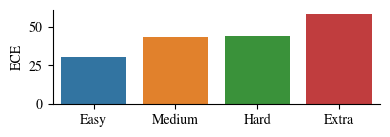

In [11]:
import seaborn as sns
from matplotlib import pyplot as plt 
import pandas as pd
plt.rcParams["font.family"] = "Nimbus Roman"

xs = [0, 1, 2, 3]
types= ["Easy", "Medium", "Hard", "Extra"]
ys = [30.6, 43.7, 43.9, 58.3]
df = []
for x, y, t in zip(xs, ys, types):
    df.append({"x": x, "y": y, "type": t})
df = pd.DataFrame(df)

fig, ax = plt.subplots(1,1, figsize=(4,1.5))
sns.barplot(data = df, x = "x", y = "y", ax=ax)
sns.despine()
ax.legend().remove()
ax.set_xticklabels(types)
ax.set_ylabel("ECE")
ax.set_xlabel("")

plt.tight_layout()
plt.savefig("/home/estengel/papers/calibration-parsing-2023/figures/ece_by_difficulty.pdf")